In [2]:
import networkx as nx
import pandas as pd
import geopandas as gpd
from geopy.distance import lonlat, distance
import matplotlib.pyplot as plt
from config import NODE_SCALE, EDGE_SCALE

In [3]:
df = pd.read_csv('./networks/nodes_locations.csv', usecols=['name', 'lng', 'lat'])
df_edges = pd.read_csv('./networks/2019-03_edges.csv', usecols=['Source','Target','Weight','Type','lng_org','lat_org','lng_dest','lat_dest'])
# df['KM'] = df.apply(
#     (lambda row:distance(lonlat(row['lon_origin'], row['lat_origin']),
#                          lonlat(row['lon_destination'], row['lat_destination'])).km), axis=1)

In [4]:
print(df['lng'].max())
print(df['lng'].min())
print(df['lat'].max())
print(df['lat'].min())

51.17744
51.047068
17.142837
16.865420999999998


In [5]:
data_copy = df.copy()

In [6]:
gdf = gpd.GeoDataFrame(
    data_copy, geometry=gpd.points_from_xy(data_copy.lat, data_copy.lng))

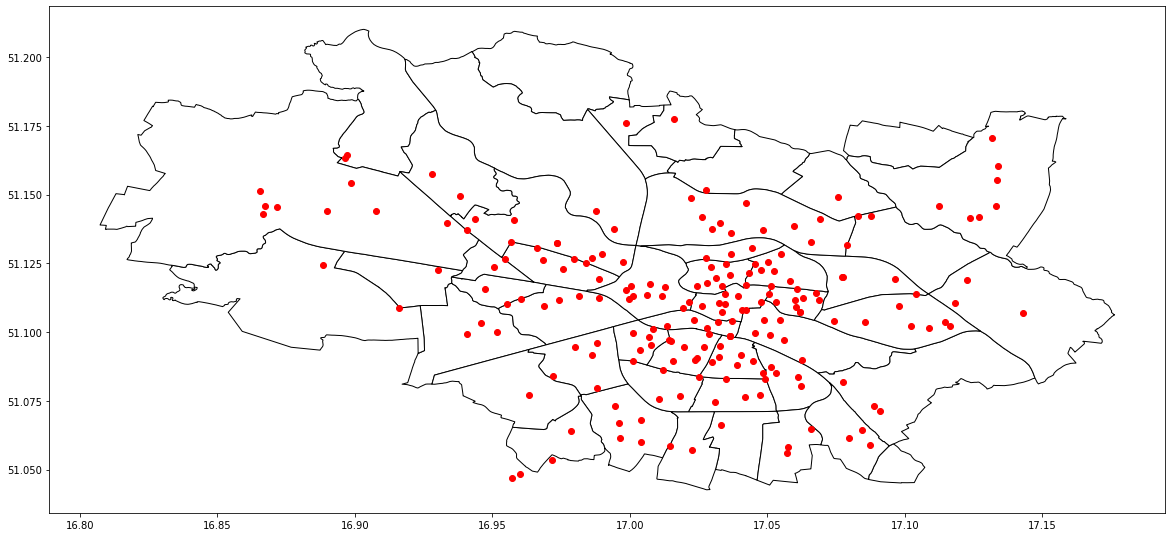

In [7]:
map_df = gpd.read_file('./maps/map.shp')
ax = map_df.plot(color='white', edgecolor='black', figsize=(20, 20))
gdf.plot(ax=ax, color='red')
# map_df

In [8]:
G = nx.DiGraph()
for index, node in df.iterrows():
    G.add_node(index, name=node.name, lat=node.lat, lng=node.lng)
for index, edge in df_edges.iterrows():
    G.add_edge(edge.Source, edge.Target, weight=edge.Weight)
    
nodes_degree = G.degree()
cc = nx.clustering(G)
closeness = nx.closeness_centrality(G)
betweenness = nx.betweenness_centrality(G)

In [9]:
max_degree = max([d for i, d in nodes_degree])
max_degree

175

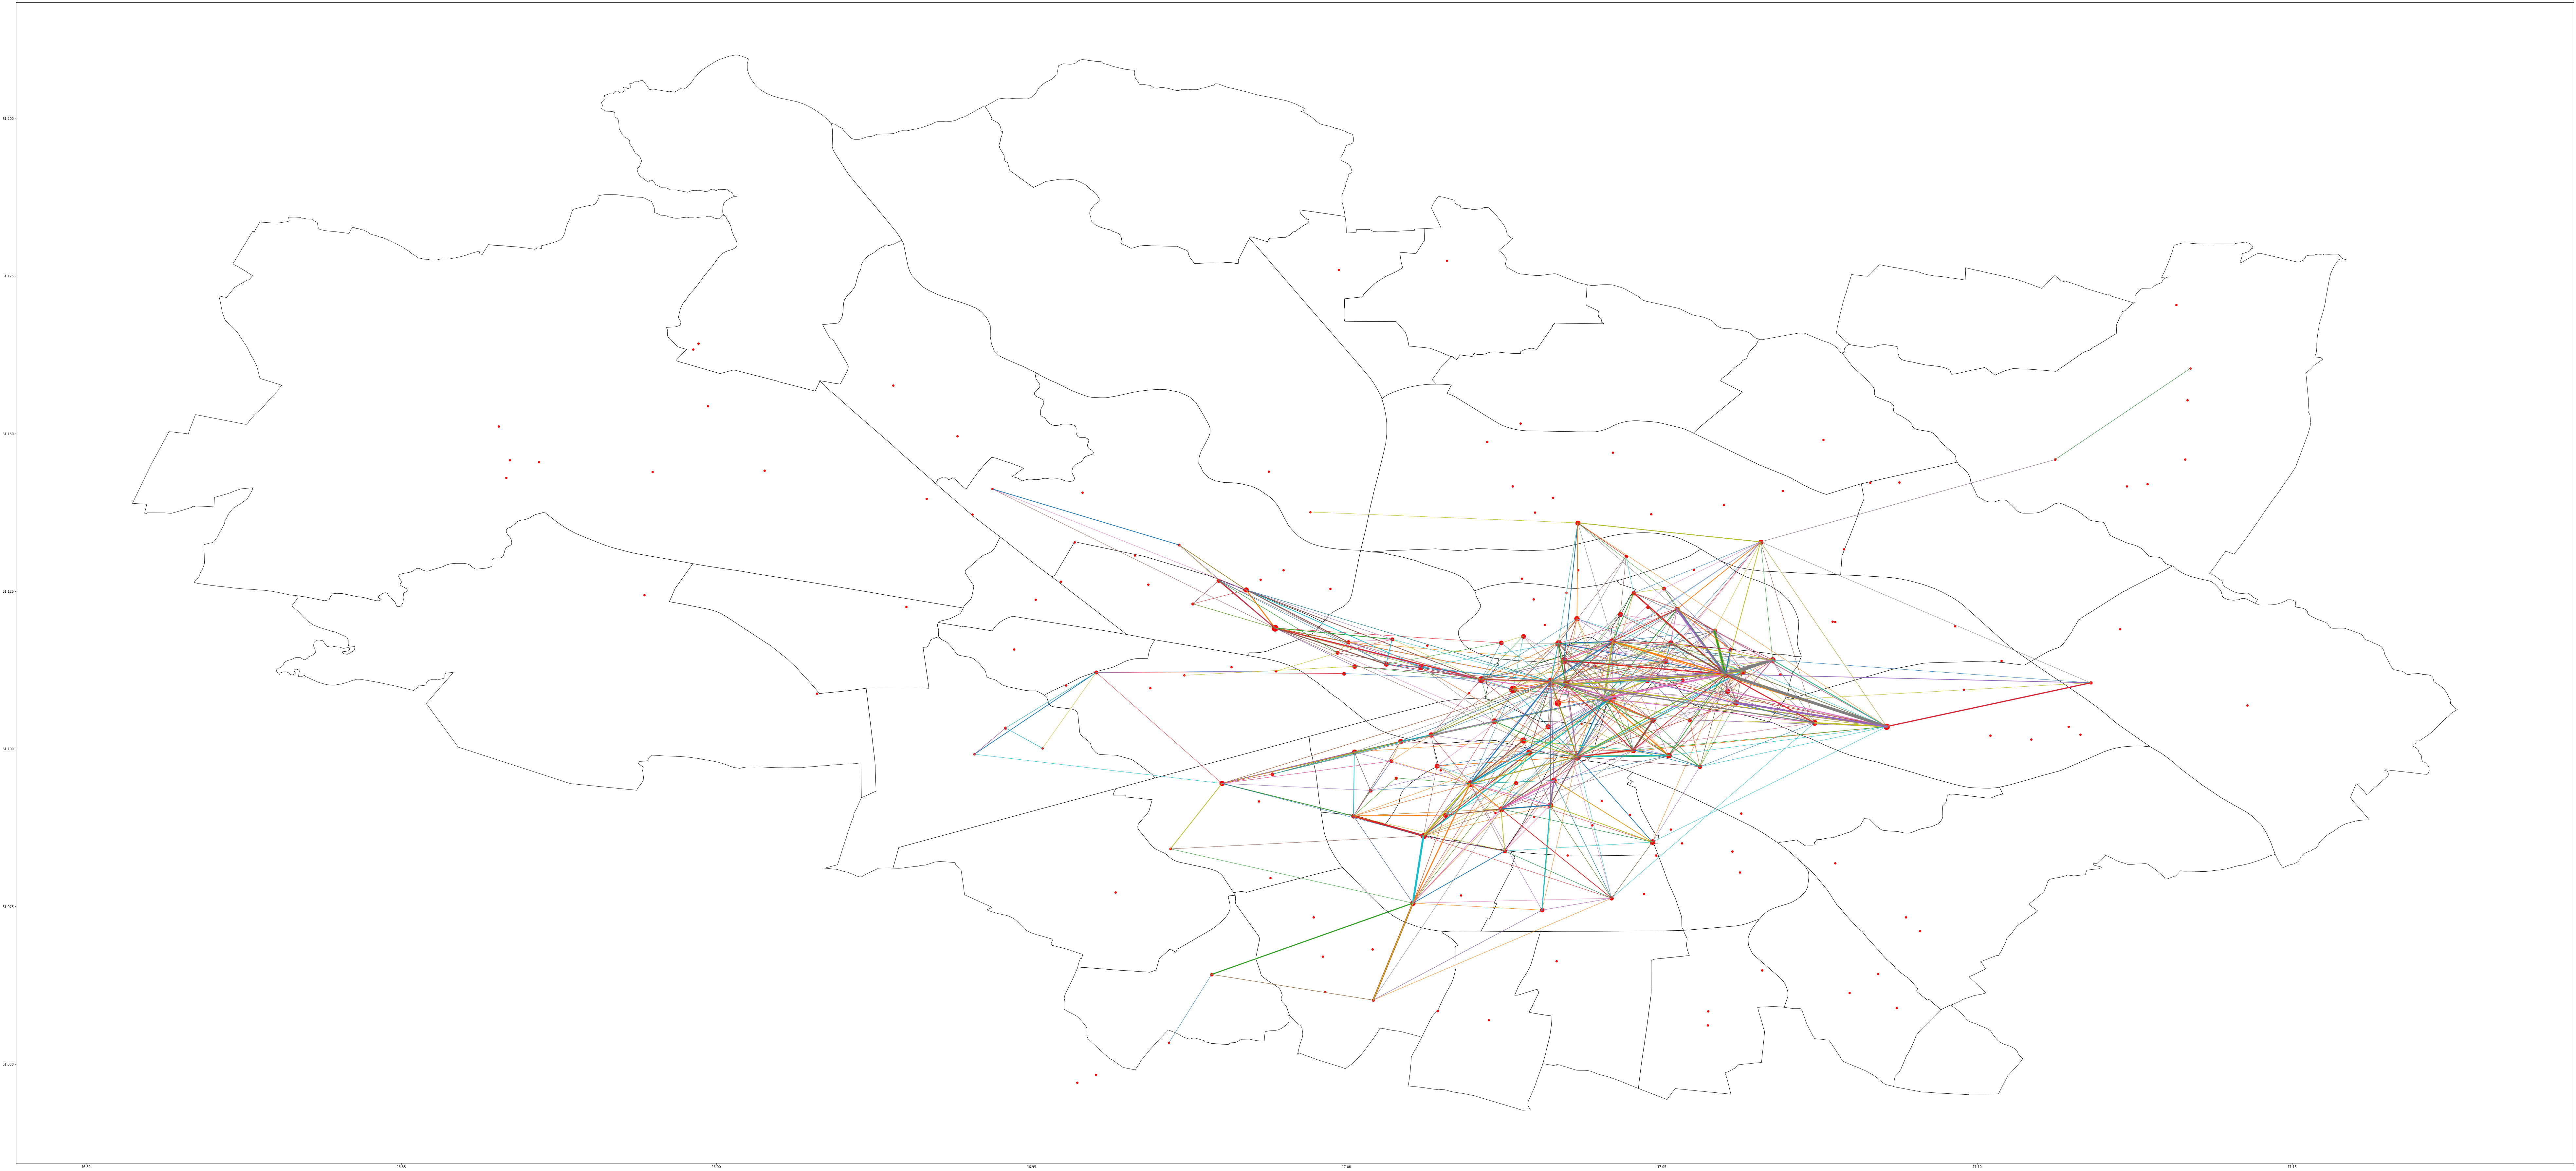

In [10]:
map_df = gpd.read_file('./maps/map.shp')
ax = map_df.plot(color='white', edgecolor='black', figsize=(140, 140))
for index, node in gdf.iterrows():
    plt.plot(
        node.lat,
        node.lng,
        'o', color='red', markersize=nodes_degree[index]/NODE_SCALE*40
    )
gdf.plot(ax=ax, color='red')
for index, row in df_edges[df_edges['Weight'] >  2].iterrows():
    plt.plot(
        [
            row['lat_org'], 
            row['lat_dest'], 
        ],
        [
            row['lng_org'], 
            row['lng_dest'], 
        ],
        linewidth=int(10*row['Weight']/EDGE_SCALE)
    )

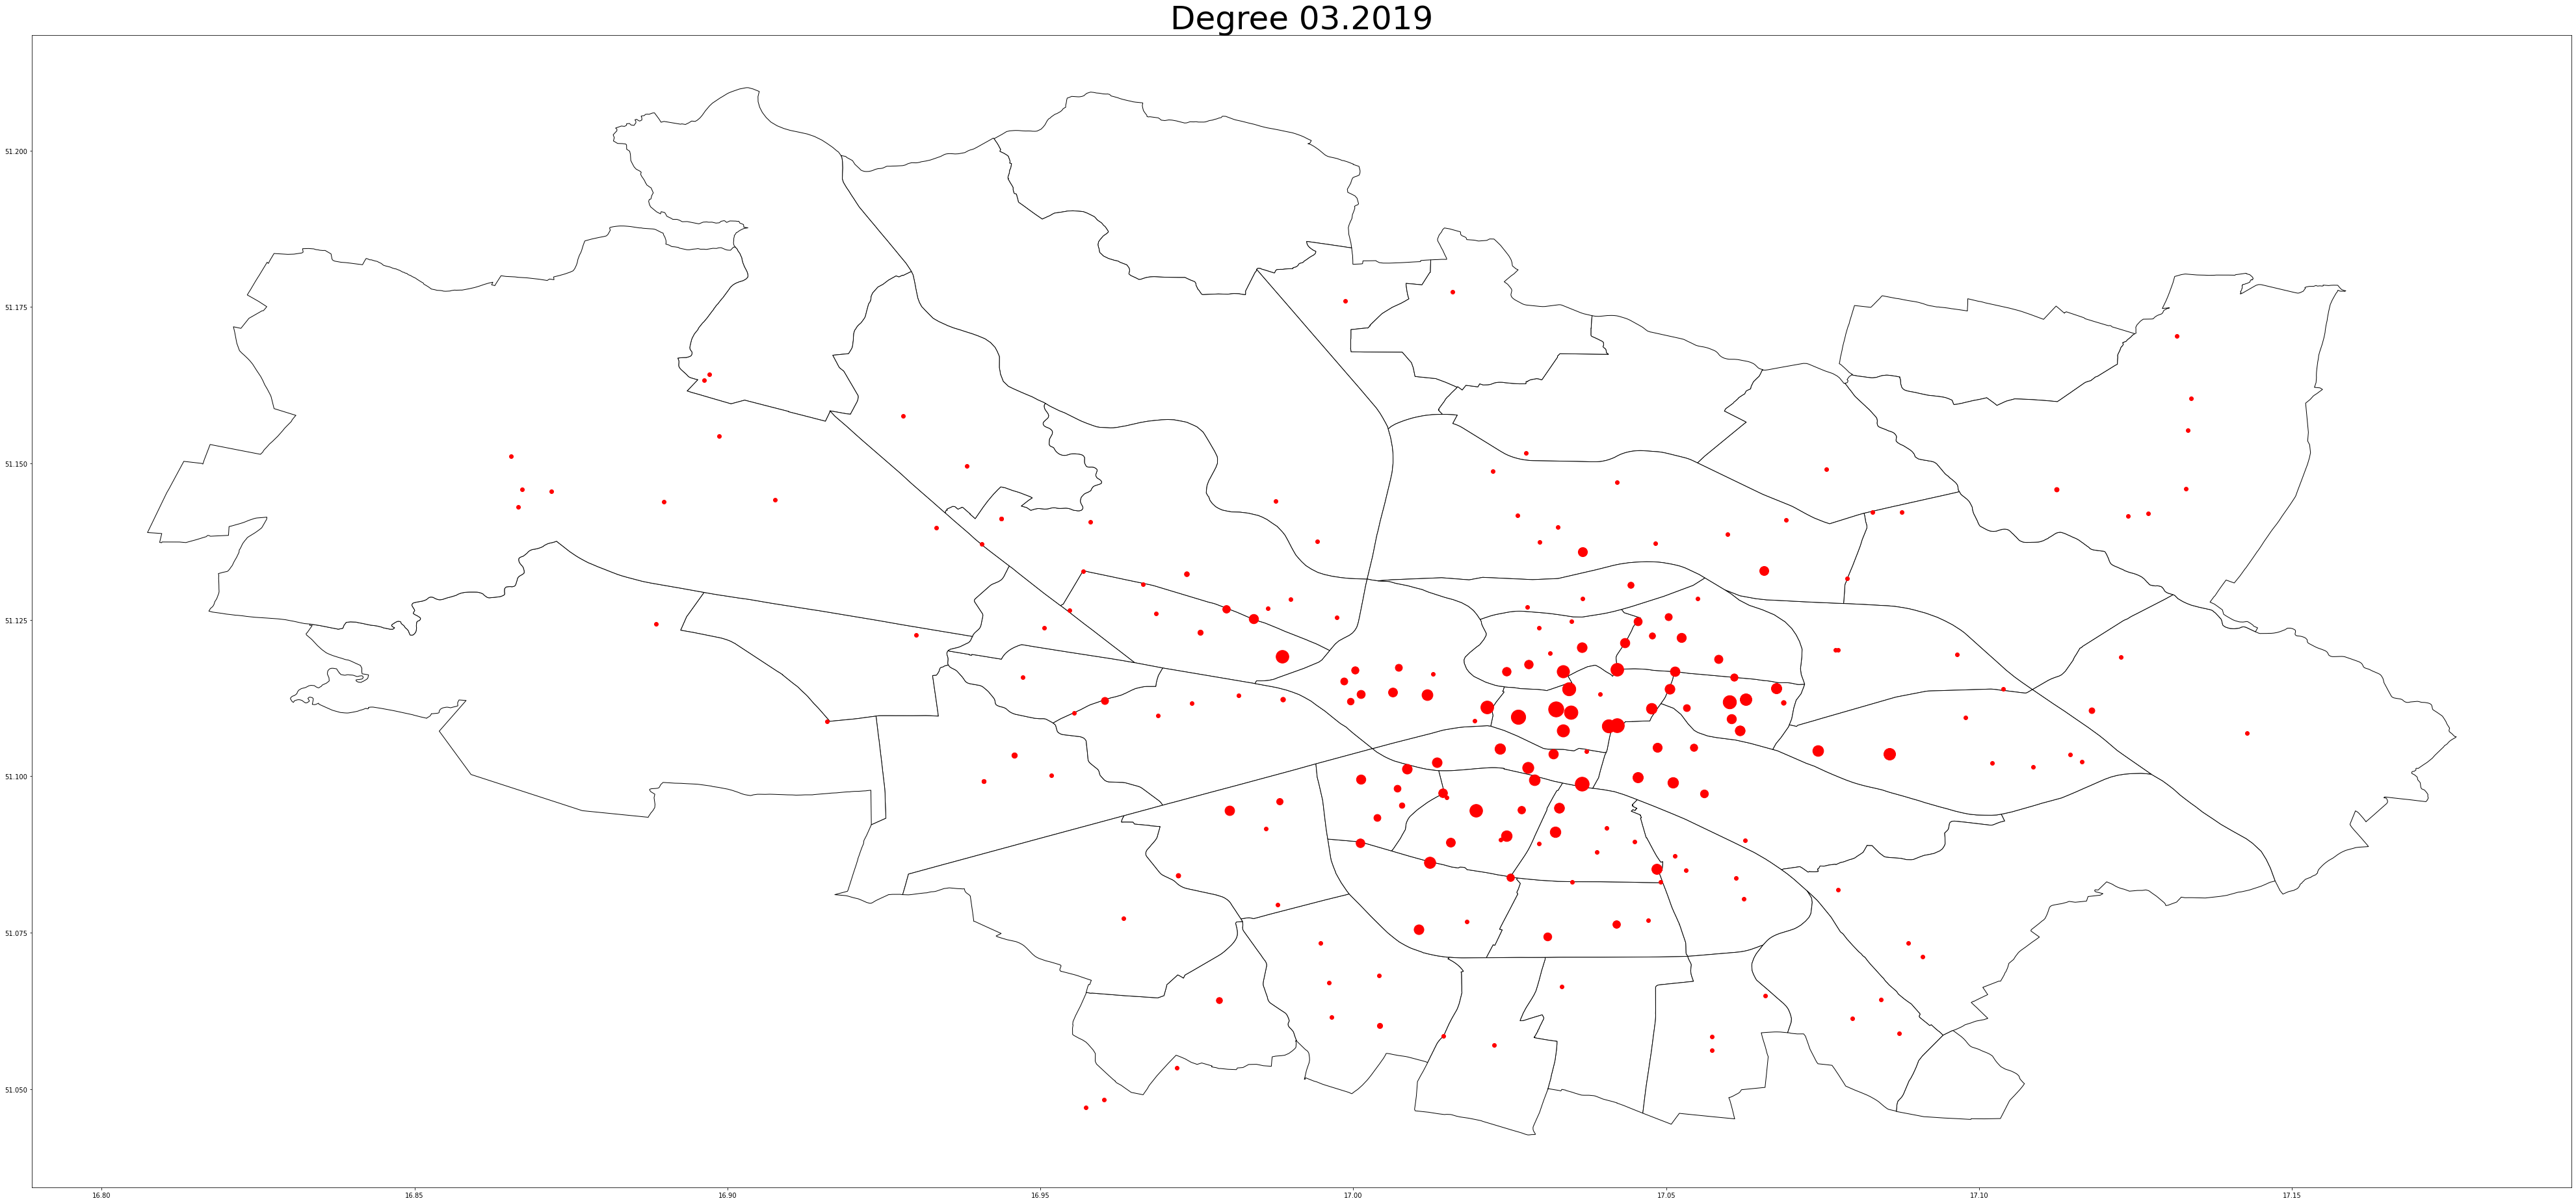

In [37]:
map_df = gpd.read_file('./maps/map.shp')
ax = map_df.plot(color='white', edgecolor='black', figsize=(70, 70))
for index, node in gdf.iterrows():
    plt.plot(
        node.lat,
        node.lng,
        'o', color='red', markersize=nodes_degree[index]/NODE_SCALE*40
    )
gdf.plot(ax=ax, color='red')
plt.title("Degree 03.2019", fontsize=50);

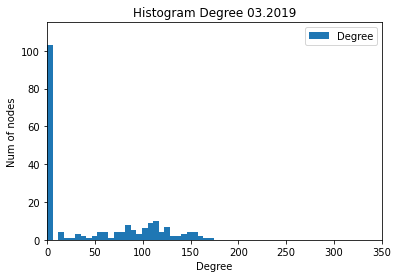

In [33]:
degrees = [d for i, d in nodes_degree]

plt.hist(degrees, bins=30, label="Degree")
plt.legend(loc="upper right")
plt.ylabel('Num of nodes')
plt.xlabel('Degree')
plt.ylim(0, 115)
plt.xlim(0, 350)
plt.title("Histogram Degree 03.2019");

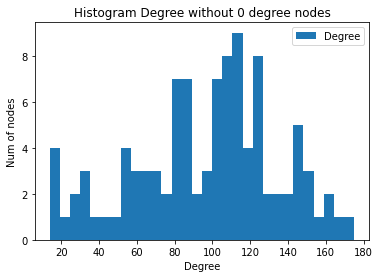

In [18]:
plt.hist(list(filter(lambda x: x > 0, degrees)), bins=30, label="Degree")
plt.legend(loc="upper right")
plt.ylabel('Num of nodes')
plt.xlabel('Degree')
plt.title("Histogram Degree without 0 degree nodes");

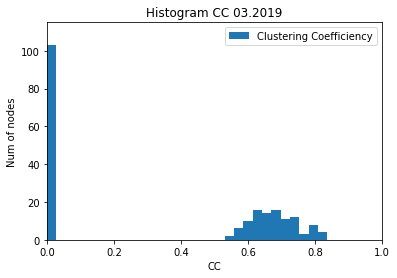

In [32]:
cc_list = [cc[d] for d in cc]

plt.hist(cc_list, bins=30, label="Clustering Coefficiency")
plt.legend(loc="upper right")
plt.ylabel('Num of nodes')
plt.xlabel('CC')
plt.ylim(0, 115)
plt.xlim(0, 1)
plt.title("Histogram CC 03.2019");

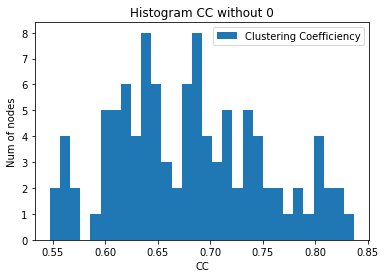

In [275]:
plt.hist(list(filter(lambda x: x > 0, cc_list)), bins=30, label="Clustering Coefficiency")
plt.legend(loc="upper right")
plt.ylabel('Num of nodes')
plt.xlabel('CC')
plt.title("Histogram CC without 0");

In [22]:
close = [closeness[d] for d in closeness]

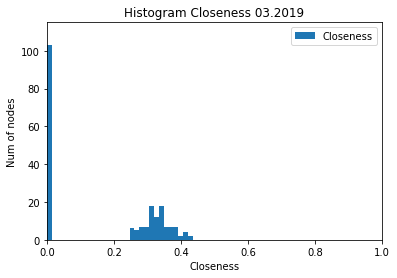

In [31]:
plt.hist(close, bins=30, label="Closeness")
plt.legend(loc="upper right")
plt.ylabel('Num of nodes')
plt.xlabel('Closeness')
plt.ylim(0, 115)
plt.xlim(0, 1)
plt.title("Histogram Closeness 03.2019");

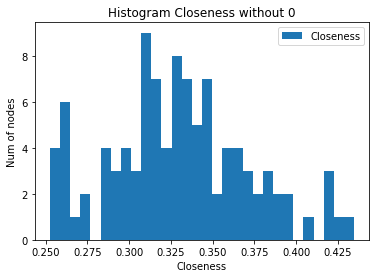

In [283]:
plt.hist(list(filter(lambda x: x > 0, close)), bins=30, label="Closeness")
plt.legend(loc="upper right")
plt.ylabel('Num of nodes')
plt.xlabel('Closeness')
plt.title("Histogram Closeness without 0");

In [25]:
betw = [betweenness[d] for d in betweenness]

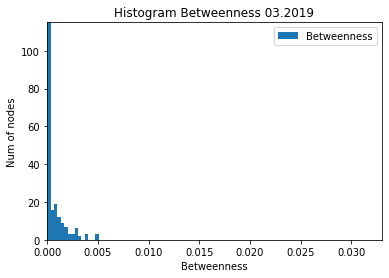

In [30]:
plt.hist(betw, bins=15, label="Betweenness")
plt.legend(loc="upper right")
plt.ylabel('Num of nodes')
plt.xlabel('Betweenness')
plt.ylim(0, 115)
plt.xlim(0, 0.033)
plt.title("Histogram Betweenness 03.2019");

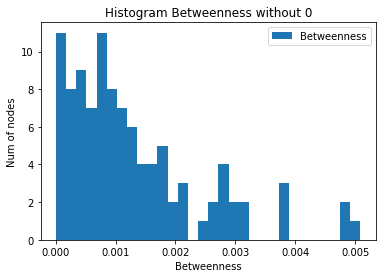

In [286]:
plt.hist(list(filter(lambda x: x > 0, betw)), bins=30, label="Betweenness")
plt.legend(loc="upper right")
plt.ylabel('Num of nodes')
plt.xlabel('Betweenness')
plt.title("Histogram Betweenness without 0");